In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\data_icaller.csv") 
df.head()

,phone,type,in_contact,duration,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,duration_call_to_miss,duration_call_in_miss,sum_call,Spam,Unnamed: 14
0,84989082183,270,82,129,4,9,28,41,10,119,0,0,82,1,NaN
1,8.42E+11,2105,29,42620,485,86,424,44,35170,4811,2639,0,1039,1,NaN
2,8.43E+11,2019,102,44968,511,214,224,102,27173,16562,1233,0,1051,1,NaN
3,84965303997,580,77,6106,57,26,85,54,245,5852,9,0,222,1,NaN
4,84979169738,23,9,455,1,5,0,3,97,358,0,0,9,1,NaN


In [3]:
del df['Unnamed: 14']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
phone                    1200 non-null object
type                     1200 non-null int64
in_contact               1200 non-null int64
duration                 1200 non-null int64
call_to                  1200 non-null int64
call_in                  1200 non-null int64
call_to_miss             1200 non-null int64
call_in_miss             1200 non-null int64
duration_call_to         1200 non-null int64
duration_call_in         1200 non-null int64
duration_call_to_miss    1200 non-null int64
duration_call_in_miss    1200 non-null int64
sum_call                 1200 non-null int64
Spam                     1200 non-null int64
dtypes: int64(13), object(1)
memory usage: 131.3+ KB


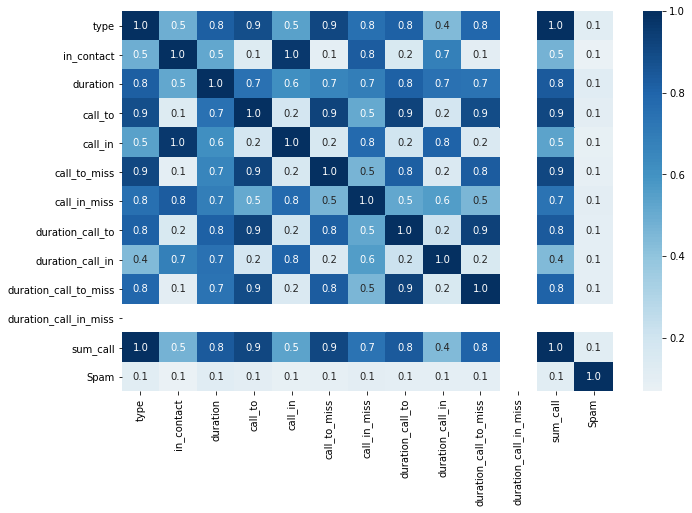

In [4]:
## Tương quan
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [5]:
df.describe()

,type,in_contact,duration,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,duration_call_to_miss,duration_call_in_miss,sum_call,Spam
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.000000,1200.000000
mean,69.278333,7.149167,921.247500,10.170833,7.495833,10.810833,2.920833,444.829167,441.615000,34.803333,0.0,31.398333,0.500000
std,517.399081,65.509960,6206.160168,87.074221,75.709565,110.351966,18.559273,3947.409755,3705.527301,329.791110,0.0,233.758256,0.500208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
25%,3.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,7.000000,0.000000,49.000000,1.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000,0.0,3.000000,0.500000
75%,25.000000,1.000000,193.250000,3.000000,1.000000,4.000000,1.000000,111.250000,19.250000,0.000000,0.0,11.000000,1.000000
max,12401.000000,1603.000000,139548.000000,2333.000000,1685.000000,2812.000000,475.000000,113102.000000,63398.000000,10650.000000,0.0,5716.000000,1.000000


In [6]:
#Tính phương sai
col=df.columns.tolist()[1:]
print(np.var(df[col]))

type                     2.674787e+05
in_contact               4.287979e+03
duration                 3.848433e+07
call_to                  7.575602e+03
call_in                  5.727162e+03
call_to_miss             1.216741e+04
call_in_miss             3.441596e+02
duration_call_to         1.556906e+07
duration_call_in         1.371949e+07
duration_call_to_miss    1.086715e+05
duration_call_in_miss    0.000000e+00
sum_call                 5.459739e+04
Spam                     2.500000e-01
dtype: float64


In [7]:
#df.drop(columns=['phone','Spam','type','in_contact','duration_call_in_miss','duration'])
#col = ['call_to', 'call_in', 'call_to_miss', 'call_in_miss', 'duration_call_to', 'duration_call_in','duration_call_to_miss','sum_call', 'Spam']
#sns.pairplot(data=df[col],hue="Spam")

# Split data

In [8]:
from sklearn.model_selection import train_test_split

#Split
X = df.drop(columns=['phone','Spam','type','in_contact','duration_call_in_miss','duration'])
Y = df['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6,  random_state=3)

# Model Classification

In [9]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def KQ(y_test, prediction):
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 score:', f1_score(y_test, prediction))
    print('Recall:', recall_score(y_test, prediction))
    print('Precision:', precision_score(y_test, prediction))
   # print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

#LogisticRegression
print('-------------------------------------LogisticRegression----------------------------------------------------------')
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
prediction = logit_reg.predict(X_test)
KQ(y_test,prediction)

#RandomForestClassifier
print('-------------------------------------RandomForestClassifier----------------------------------------------------------')
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500, random_state=1)
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)
KQ(y_test,prediction)

#Bootstrap Aggregation aka Bagging
print('-------------------------------------Bagging----------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)
prediction = bagging.predict(X_test)
KQ(y_test,prediction)

# AdaBoost boosting
print('-------------------------------------Boostingr----------------------------------------------------------')
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)
prediction = boost.predict(X_test)
KQ(y_test,prediction)

# DecisionTree
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)
KQ(y_test,prediction)

#Naive Bayes
print('-------------------------------------Naive Bayes----------------------------------------------------------')
from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB(alpha=0.01)
NaiveBayes.fit(X_train, y_train)
prediction = NaiveBayes.predict(X_test)
KQ(y_test,prediction)


-------------------------------------LogisticRegression----------------------------------------------------------
Accuracy: 0.7805555555555556
F1 score: 0.75
Recall: 0.6694915254237288
Precision: 0.8525179856115108

 confussion matrix:
 [[325  41]
 [117 237]]
-------------------------------------RandomForestClassifier----------------------------------------------------------
Accuracy: 0.8097222222222222
F1 score: 0.8067700987306065
Recall: 0.807909604519774
Precision: 0.8056338028169014

 confussion matrix:
 [[297  69]
 [ 68 286]]
-------------------------------------Bagging----------------------------------------------------------
Accuracy: 0.8138888888888889
F1 score: 0.8101983002832861
Recall: 0.807909604519774
Precision: 0.8125

 confussion matrix:
 [[300  66]
 [ 68 286]]
-------------------------------------Boostingr----------------------------------------------------------
Accuracy: 0.7847222222222222
F1 score: 0.7856154910096819
Recall: 0.8022598870056498
Precision: 0.7696476964

# #Data_icaller_12feature

In [28]:
df_12 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\data_icaller_12_feature.csv") 
df_12.head(10)

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success,Spam,phone
0,4.0,9.0,28.0,41.0,10.0,119.0,0.312499,2.379995,1.000000,43,0.036585,1,84989082183
1,485.0,86.0,424.0,44.0,35170.0,4811.0,38.690865,37.007664,0.027911,925,0.566891,1,8.42473E+11
2,511.0,214.0,224.0,102.0,27173.0,16562.0,36.970063,52.411376,0.097050,807,0.651760,1,8.42871E+11
3,1.0,5.0,0.0,3.0,97.0,358.0,96.990301,44.749441,1.000000,9,0.666667,1,84979169738
4,303.0,104.0,282.0,59.0,33429.0,6250.0,57.143580,38.343535,0.169786,699,0.550802,1,8.42863E+11
5,6.0,0.0,20.0,6.0,89.0,0.0,3.423064,0.000000,0.031250,27,0.468750,1,84932735077
6,11.0,0.0,26.0,3.0,291.0,0.0,7.864844,0.000000,0.050000,36,0.325000,1,84932719354
7,17.0,0.0,18.0,1.0,1045.0,0.0,29.857058,0.000000,0.000000,28,0.527778,1,84932721581
8,6.0,0.0,17.0,3.0,158.0,0.0,6.869535,0.000000,0.000000,21,0.461538,1,84932705277
9,5.0,0.0,20.0,0.0,88.0,0.0,3.519986,0.000000,0.000000,20,0.200000,1,84932739426


In [11]:
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
call_to                 1200 non-null float64
call_in                 1200 non-null float64
call_to_miss            1200 non-null float64
call_in_miss            1200 non-null float64
duration_call_to        1200 non-null float64
duration_call_in        1200 non-null float64
avg_duration_call_to    1200 non-null float64
avg_duration_call_in    1200 non-null float64
avg_in_contact          1200 non-null float64
in_hour                 1200 non-null int64
avg_success             1200 non-null float64
Spam                    1200 non-null int64
phone                   1200 non-null object
dtypes: float64(10), int64(2), object(1)
memory usage: 122.0+ KB


In [12]:
print(df_12.describe())


           call_to      call_in  call_to_miss  call_in_miss  duration_call_to  \
count  1200.000000  1200.000000   1200.000000   1200.000000       1200.000000   
mean     10.122500     7.458333     10.817500      2.900833        441.855000   
std      87.062769    75.699198    110.327351     18.501881       3946.029385   
min       0.000000     0.000000      0.000000      0.000000          0.000000   
25%       0.000000     0.000000      0.000000      0.000000          0.000000   
50%       1.000000     0.000000      1.000000      0.000000         17.000000   
75%       3.000000     1.000000      4.000000      1.000000        110.000000   
max    2333.000000  1685.000000   2812.000000    475.000000     113102.000000   

       duration_call_in  avg_duration_call_to  avg_duration_call_in  \
count       1200.000000           1200.000000           1200.000000   
mean         427.959167             18.199615             13.076672   
std         3691.692599             36.283978            

In [13]:
#Tính phương sai
variance_df12 = round(pow(df_12.std(),2),2)
print(variance_df12)

call_to                     7579.93
call_in                     5730.37
call_to_miss               12172.12
call_in_miss                 342.32
duration_call_to        15571147.91
duration_call_in        13628594.25
avg_duration_call_to        1316.53
avg_duration_call_in        2655.53
avg_in_contact                 0.21
in_hour                    32188.96
avg_success                    0.14
Spam                           0.25
dtype: float64


# Split with spam

In [14]:
df_12_spam = df_12.ix[df_12.Spam == 1]
print(df_12_spam.describe())

           call_to      call_in  call_to_miss  call_in_miss  duration_call_to  \
count   593.000000   593.000000    593.000000    593.000000        593.000000   
mean     19.187184    13.846543     20.912310      4.893761        840.121417   
std     123.212916   107.315957    156.345951     26.056018       5586.306093   
min       0.000000     0.000000      0.000000      0.000000          0.000000   
25%       0.000000     0.000000      1.000000      0.000000          0.000000   
50%       2.000000     0.000000      3.000000      0.000000         43.000000   
75%       7.000000     0.000000     10.000000      2.000000        209.000000   
max    2333.000000  1685.000000   2812.000000    475.000000     113102.000000   

       duration_call_in  avg_duration_call_to  avg_duration_call_in  \
count        593.000000            593.000000            593.000000   
mean         794.359191             16.851962              4.628878   
std         5222.583884             31.514005            

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


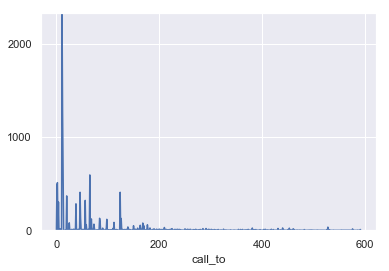

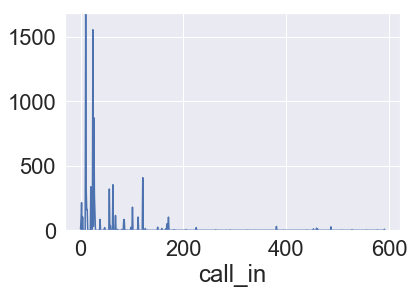

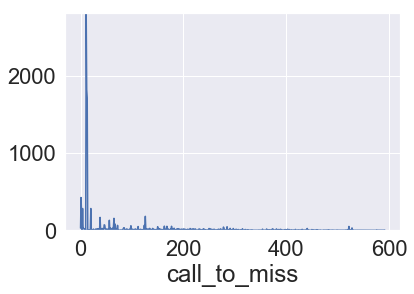

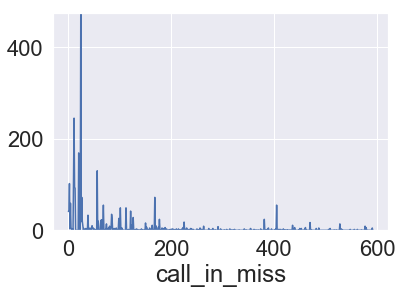

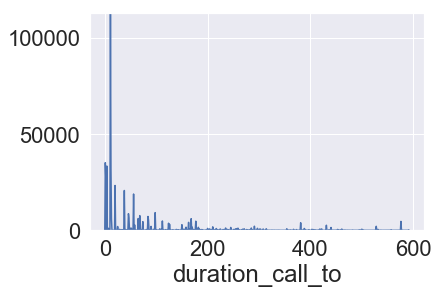

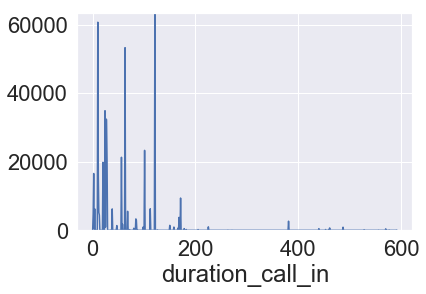

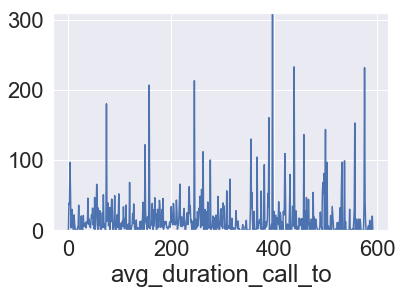

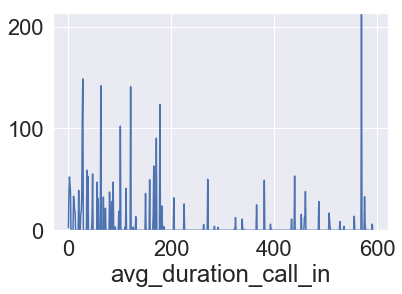

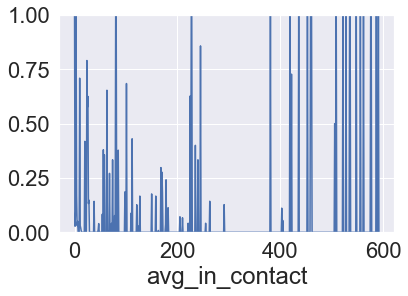

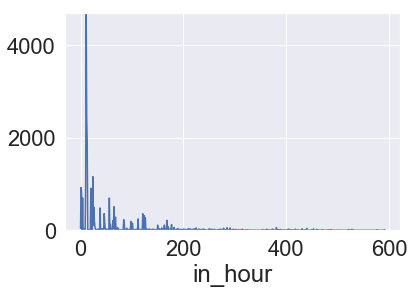

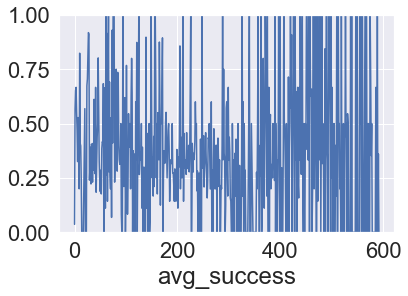

In [47]:
col=df_12.columns.tolist()[:(df_12.shape[1]-2)]
for i in range(0 , len(col)) :
    df_12_spam[col[i]].plot(ylim=[df_12_spam[col[i]].min(), df_12_spam[col[i]].max()], legend=False)
    plt.xlabel(col[i]) # set x-axis label
    #plt.ylabel(’Ridership (in 000s)’) # set y-axis label
    sns.set(font_scale=2)
    plt.show()
#print(col)

# Notspam

In [15]:
df_12_notspam = df_12.ix[df_12.Spam == 0]
print(df_12_notspam.describe())

          call_to     call_in  call_to_miss  call_in_miss  duration_call_to  \
count  607.000000  607.000000    607.000000    607.000000        607.000000   
mean     1.266886    1.217463      0.955519      0.953871         52.774300   
std      2.755362    2.865320      2.578727      2.526006        124.691567   
min      0.000000    0.000000      0.000000      0.000000          0.000000   
25%      0.000000    0.000000      0.000000      0.000000          0.000000   
50%      1.000000    0.000000      0.000000      0.000000          1.000000   
75%      1.000000    1.000000      1.000000      1.000000         50.000000   
max     27.000000   50.000000     35.000000     41.000000       1441.000000   

       duration_call_in  avg_duration_call_to  avg_duration_call_in  \
count        607.000000            607.000000            607.000000   
mean          70.009885             19.516185             21.329624   
std          244.662332             40.386998             69.164208   
min 

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


# Visualization

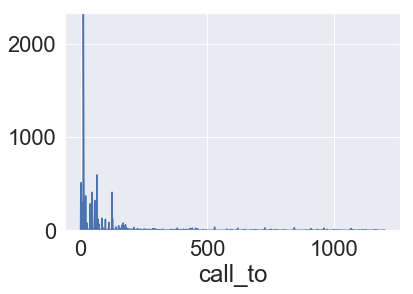

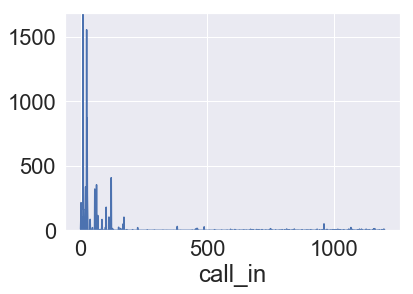

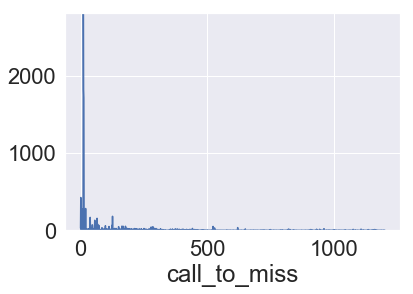

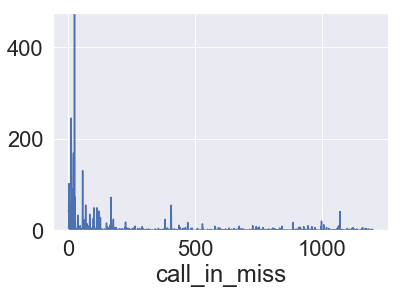

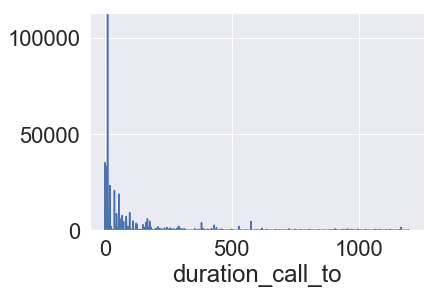

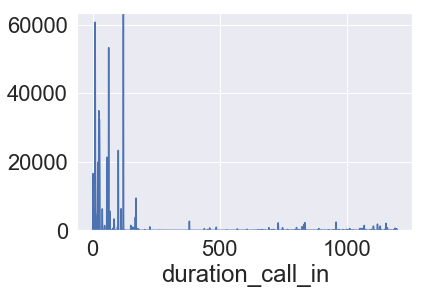

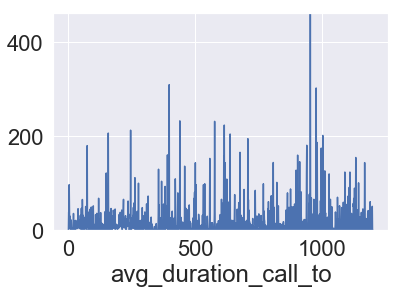

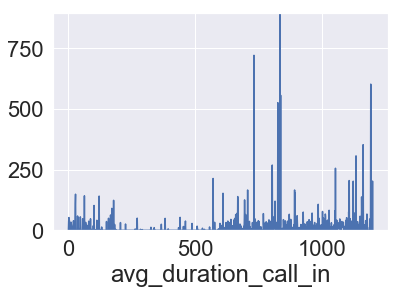

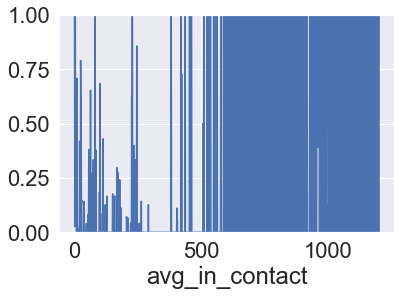

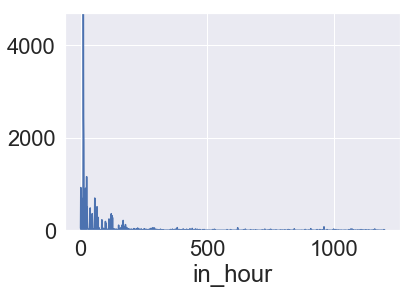

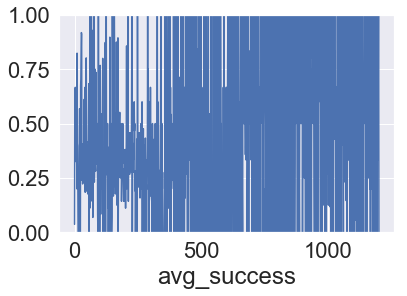

In [57]:
col=df_12.columns.tolist()[:(df_12.shape[1]-2)]
for i in range(0 , len(col)) :
    df_12[col[i]].plot(ylim=[df_12[col[i]].min(), df_12[col[i]].max()],legend=False)
    plt.xlabel(col[i]) # set x-axis label
    #plt.ylabel(’Ridership (in 000s)’) # set y-axis label
    plt.show()
#print(col)

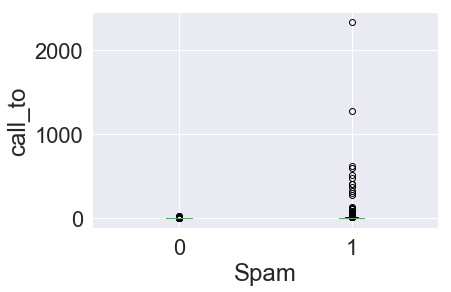

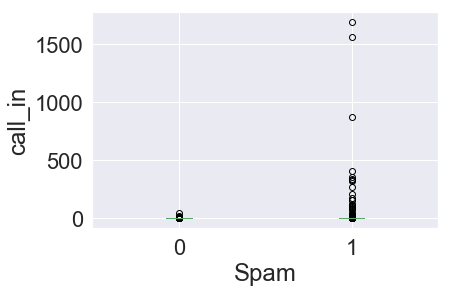

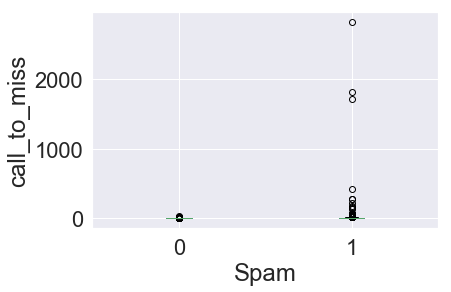

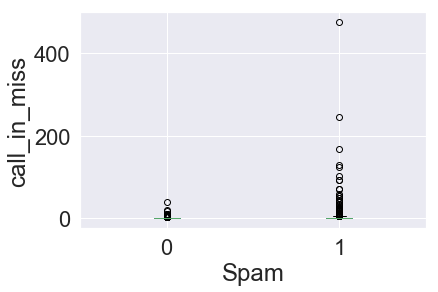

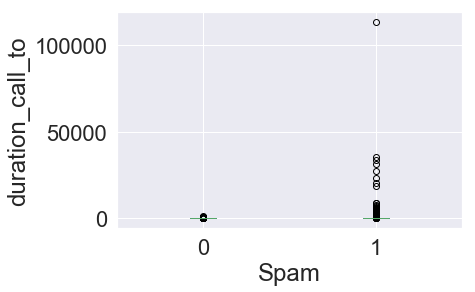

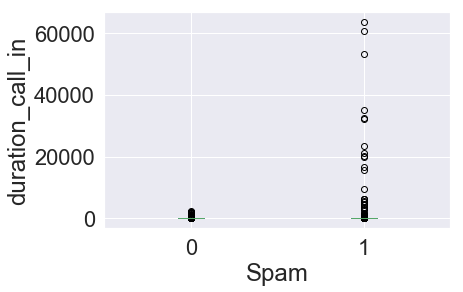

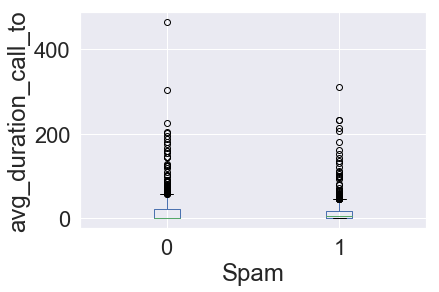

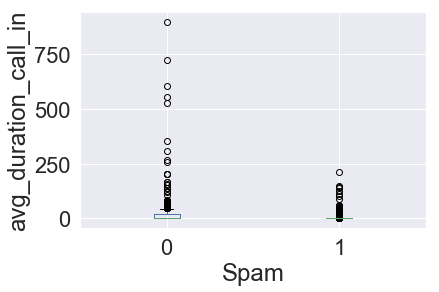

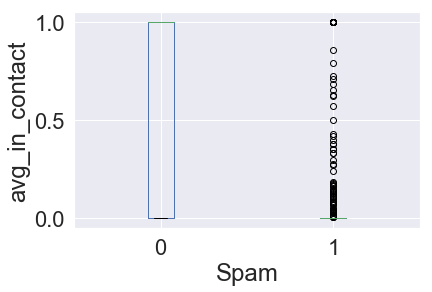

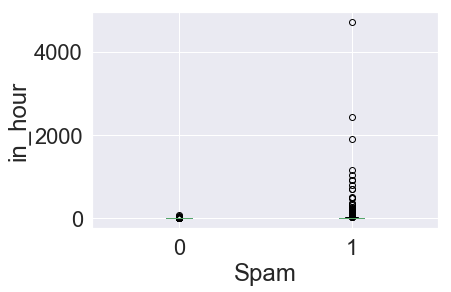

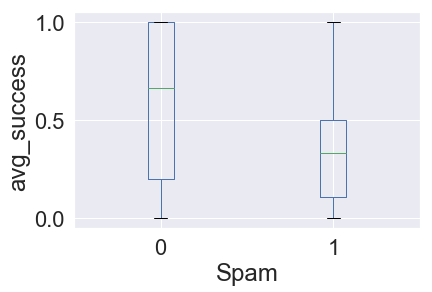

In [54]:
col=df_12.columns.tolist()[:(df_12.shape[1]-2)]
for i in range(0 , len(col)) :
    ax = df_12.boxplot(column= col[i], by='Spam')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')

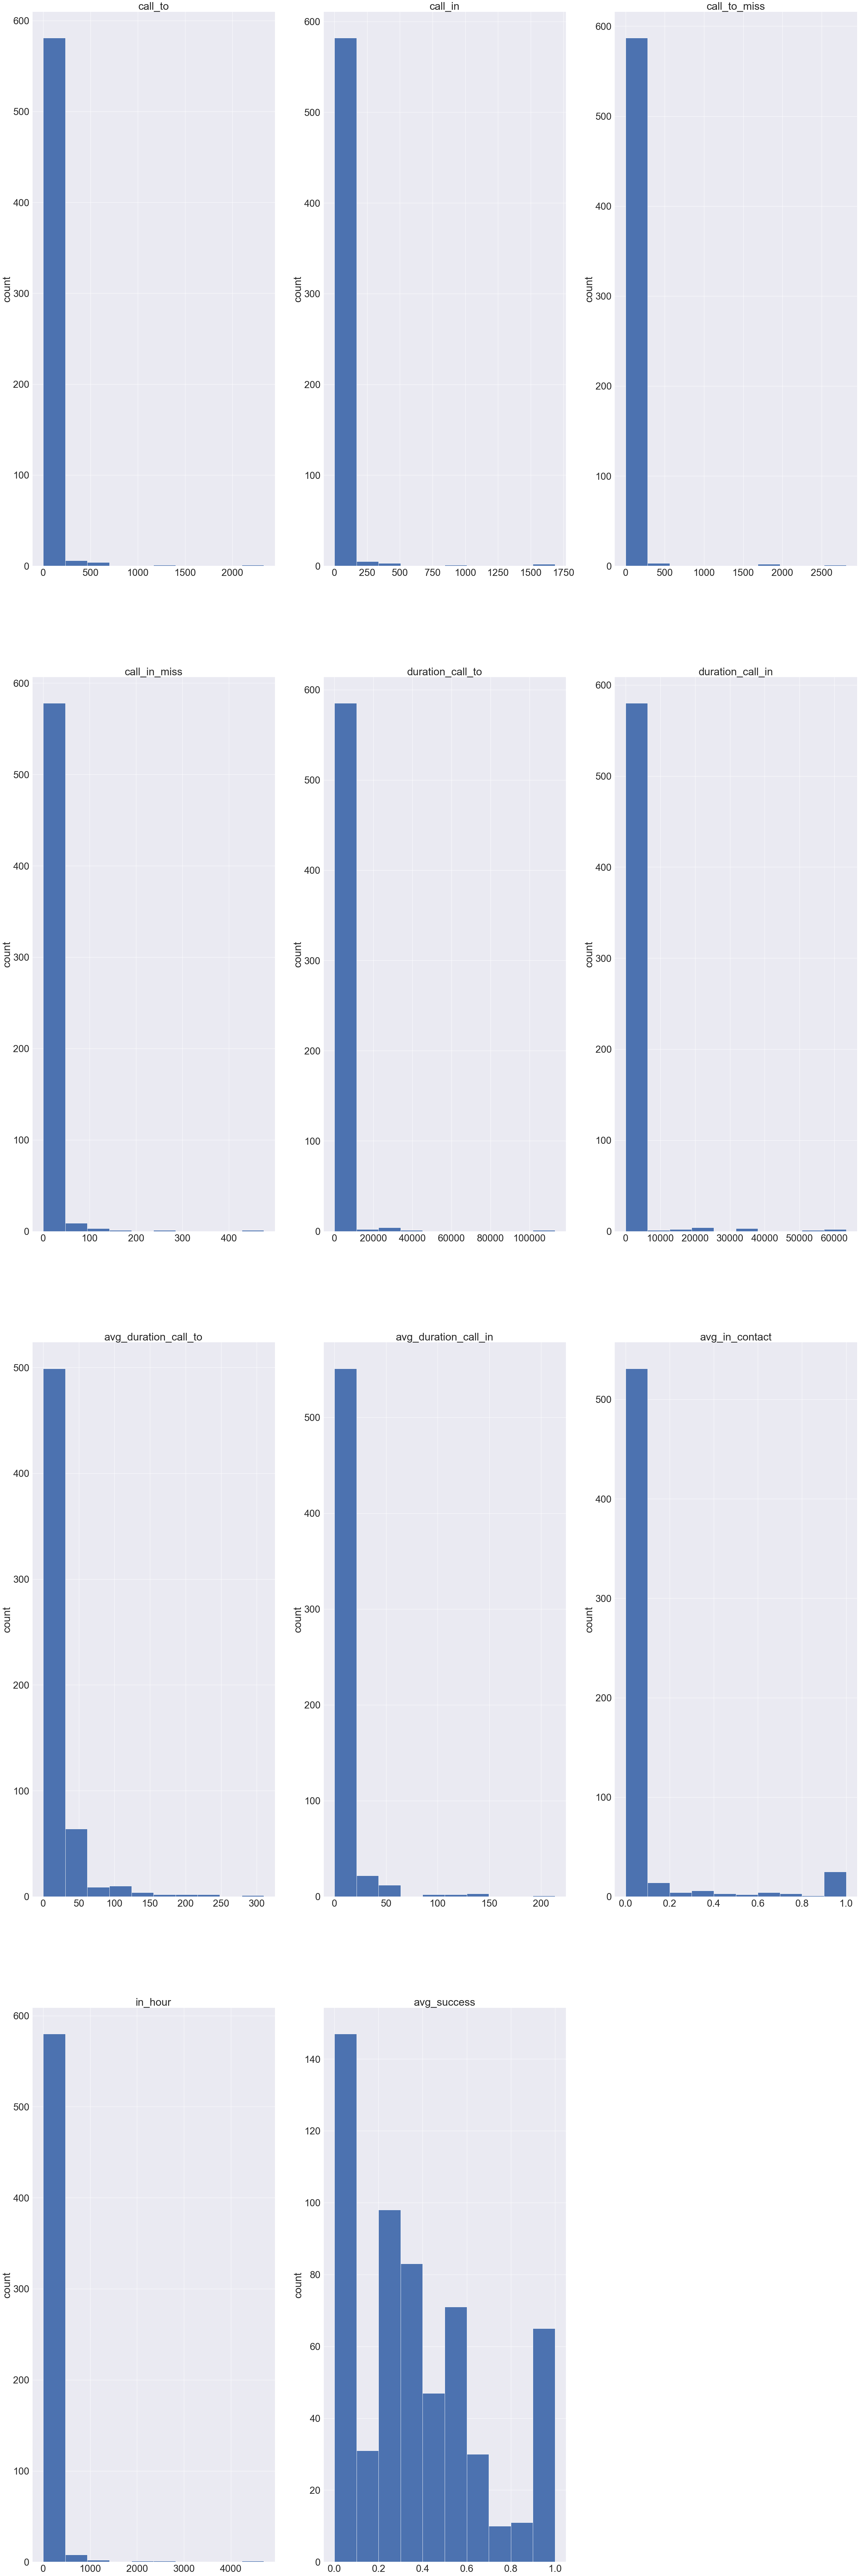

In [18]:
figure = plt.figure(figsize=(50, 200))
for i in range(0 , len(col)) :
  sns.set(font_scale=3)
  ax=plt.subplot(5,3,i+1)
  ax = df_12_spam[col[i]].hist()
  ax.set_axisbelow(True) 
  ax.set_ylabel('count')
  ax.set_title(col[i])
plt.show()

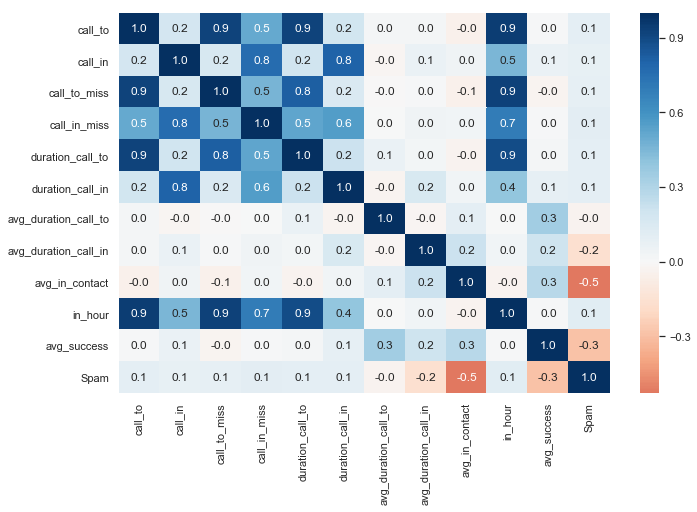

In [40]:
## Tương quan
corr = df_12.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
sns.set(font_scale=0)

# Split data

In [29]:
#Split
X = df_12.drop(columns=['phone','Spam'])
Y = df_12['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7,  random_state=3)

# Model

In [30]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def KQ(y_test, prediction):
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 score:', f1_score(y_test, prediction))
    print('Recall:', recall_score(y_test, prediction))
    print('Precision:', precision_score(y_test, prediction))
   # print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

#LogisticRegression
print('-------------------------------------LogisticRegression----------------------------------------------------------')
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
prediction = logit_reg.predict(X_test)
KQ(y_test,prediction)

#RandomForestClassifier
print('-------------------------------------RandomForestClassifier----------------------------------------------------------')
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500, random_state=1)
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)
KQ(y_test,prediction)

#Bootstrap Aggregation aka Bagging
print('-------------------------------------Bagging----------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)
prediction = bagging.predict(X_test)
KQ(y_test,prediction)

# AdaBoost boosting
print('-------------------------------------Boostingr----------------------------------------------------------')
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)
prediction = boost.predict(X_test)
KQ(y_test,prediction)

# DecisionTree
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)
KQ(y_test,prediction)

#Naive Bayes
print('-------------------------------------Naive Bayes----------------------------------------------------------')
from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB(alpha=0.01)
NaiveBayes.fit(X_train, y_train)
prediction = NaiveBayes.predict(X_test)
KQ(y_test,prediction)


-------------------------------------LogisticRegression----------------------------------------------------------
Accuracy: 0.7880952380952381
F1 score: 0.7968036529680366
Recall: 0.8349282296650717
Precision: 0.7620087336244541

 confussion matrix:
 [[313 109]
 [ 69 349]]
-------------------------------------RandomForestClassifier----------------------------------------------------------
Accuracy: 0.8047619047619048
F1 score: 0.8066037735849058
Recall: 0.8181818181818182
Precision: 0.7953488372093023

 confussion matrix:
 [[334  88]
 [ 76 342]]
-------------------------------------Bagging----------------------------------------------------------
Accuracy: 0.7880952380952381
F1 score: 0.7910798122065728
Recall: 0.80622009569378
Precision: 0.7764976958525346

 confussion matrix:
 [[325  97]
 [ 81 337]]
-------------------------------------Boostingr----------------------------------------------------------
Accuracy: 0.7273809523809524
F1 score: 0.7217496962332929
Recall: 0.71052631578947

# data 11 features

In [32]:
#Split
X = df_12.drop(columns=['phone','Spam','avg_duration_call_to'])
Y = df_12['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7,  random_state=3)
#print(X_train)

In [33]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def KQ(y_test, prediction):
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 score:', f1_score(y_test, prediction))
    print('Recall:', recall_score(y_test, prediction))
    print('Precision:', precision_score(y_test, prediction))
   # print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

#LogisticRegression
print('-------------------------------------LogisticRegression----------------------------------------------------------')
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
prediction = logit_reg.predict(X_test)
KQ(y_test,prediction)

#RandomForestClassifier
print('-------------------------------------RandomForestClassifier----------------------------------------------------------')
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500, random_state=1)
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)
KQ(y_test,prediction)

#Bootstrap Aggregation aka Bagging
print('-------------------------------------Bagging----------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)
prediction = bagging.predict(X_test)
KQ(y_test,prediction)

# AdaBoost boosting
print('-------------------------------------Boostingr----------------------------------------------------------')
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)
prediction = boost.predict(X_test)
KQ(y_test,prediction)

# DecisionTree
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)
KQ(y_test,prediction)

#Naive Bayes
print('-------------------------------------Naive Bayes----------------------------------------------------------')
from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB(alpha=0.01)
NaiveBayes.fit(X_train, y_train)
prediction = NaiveBayes.predict(X_test)
KQ(y_test,prediction)


-------------------------------------LogisticRegression----------------------------------------------------------
Accuracy: 0.7916666666666666
F1 score: 0.800910125142207
Recall: 0.8421052631578947
Precision: 0.7635574837310195

 confussion matrix:
 [[313 109]
 [ 66 352]]
-------------------------------------RandomForestClassifier----------------------------------------------------------
Accuracy: 0.805952380952381
F1 score: 0.8084606345475911
Recall: 0.8229665071770335
Precision: 0.7944572748267898

 confussion matrix:
 [[333  89]
 [ 74 344]]
-------------------------------------Bagging----------------------------------------------------------
Accuracy: 0.7869047619047619
F1 score: 0.7886658795749704
Recall: 0.7990430622009569
Precision: 0.7785547785547785

 confussion matrix:
 [[327  95]
 [ 84 334]]
-------------------------------------Boostingr----------------------------------------------------------
Accuracy: 0.7404761904761905
F1 score: 0.7423167848699764
Recall: 0.75119617224880

# data 10 features

In [34]:
#Split
X = df_12.drop(columns=['phone','Spam','avg_duration_call_to','avg_duration_call_in'])
Y = df_12['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7,  random_state=3)

In [35]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def KQ(y_test, prediction):
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 score:', f1_score(y_test, prediction))
    print('Recall:', recall_score(y_test, prediction))
    print('Precision:', precision_score(y_test, prediction))
   # print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

#LogisticRegression
print('-------------------------------------LogisticRegression----------------------------------------------------------')
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
prediction = logit_reg.predict(X_test)
KQ(y_test,prediction)

#RandomForestClassifier
print('-------------------------------------RandomForestClassifier----------------------------------------------------------')
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500, random_state=1)
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)
KQ(y_test,prediction)

#Bootstrap Aggregation aka Bagging
print('-------------------------------------Bagging----------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)
prediction = bagging.predict(X_test)
KQ(y_test,prediction)

# AdaBoost boosting
print('-------------------------------------Boostingr----------------------------------------------------------')
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)
prediction = boost.predict(X_test)
KQ(y_test,prediction)

# DecisionTree
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)
KQ(y_test,prediction)

#Naive Bayes
print('-------------------------------------Naive Bayes----------------------------------------------------------')
from sklearn.naive_bayes import MultinomialNB
NaiveBayes = MultinomialNB(alpha=0.01)
NaiveBayes.fit(X_train, y_train)
prediction = NaiveBayes.predict(X_test)
KQ(y_test,prediction)


-------------------------------------LogisticRegression----------------------------------------------------------
Accuracy: 0.7690476190476191
F1 score: 0.7562814070351759
Recall: 0.7200956937799043
Precision: 0.7962962962962963

 confussion matrix:
 [[345  77]
 [117 301]]
-------------------------------------RandomForestClassifier----------------------------------------------------------


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.8071428571428572
F1 score: 0.8089622641509434
Recall: 0.8205741626794258
Precision: 0.7976744186046512

 confussion matrix:
 [[335  87]
 [ 75 343]]
-------------------------------------Bagging----------------------------------------------------------
Accuracy: 0.780952380952381
F1 score: 0.7819905213270142
Recall: 0.7894736842105263
Precision: 0.7746478873239436

 confussion matrix:
 [[326  96]
 [ 88 330]]
-------------------------------------Boostingr----------------------------------------------------------
Accuracy: 0.75
F1 score: 0.7469879518072288
Recall: 0.7416267942583732
Precision: 0.7524271844660194

 confussion matrix:
 [[320 102]
 [108 310]]
-------------------------------------DecisionTree----------------------------------------------------------
Accuracy: 0.75
F1 score: 0.7494033412887828
Recall: 0.7511961722488039
Precision: 0.7476190476190476

 confussion matrix:
 [[316 106]
 [104 314]]
-------------------------------------Naive Bayes-------------------------

In [58]:
df_spam_history = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\history_spam.csv") 
df_spam_history.head(10)

,phone,member_phone,type,time,in_contact,duration,hour,in_hour,success,day_of_week
0,8.498908e+10,8.493177e+10,3,9/10/2020 7:03,1,0,7,False,False,3
1,8.498908e+10,8.493177e+10,1,9/14/2020 17:01,1,2,17,True,False,0
2,8.498908e+10,8.493177e+10,4,9/14/2020 21:52,1,0,21,False,False,0
3,8.498908e+10,8.493177e+10,4,9/9/2020 7:24,1,0,7,False,False,2
4,8.498908e+10,8.493177e+10,4,9/14/2020 21:53,1,0,21,False,False,0
5,8.498908e+10,8.493177e+10,4,9/9/2020 20:34,1,0,20,False,False,2
6,8.498908e+10,8.493177e+10,3,9/18/2020 6:52,1,0,6,False,False,4
7,8.498908e+10,8.493177e+10,4,9/17/2020 13:59,1,0,13,True,False,3
8,8.498908e+10,8.493177e+10,1,9/17/2020 7:40,1,1,7,False,False,3
9,8.498908e+10,8.493177e+10,3,9/17/2020 7:40,1,0,7,False,False,3


In [59]:
df_spam_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34892 entries, 0 to 34891
Data columns (total 10 columns):
phone           34892 non-null float64
member_phone    34892 non-null float64
type            34892 non-null int64
time            34892 non-null object
in_contact      34892 non-null int64
duration        34892 non-null int64
hour            34892 non-null int64
in_hour         34892 non-null bool
success         34892 non-null bool
day_of_week     34892 non-null int64
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 2.2+ MB


In [193]:
df_spam_history['day'] = ''
df_spam_history['month'] = ''
df_spam_history['year'] = ''

In [194]:
import datetime
import pytz
from dateutil.parser import parse
df_spam_history.day = pd.to_datetime(df_spam_history.time).dt.day
df_spam_history.month = pd.to_datetime(df_spam_history.time).dt.month
df_spam_history.year = pd.to_datetime(df_spam_history.time).dt.year

In [195]:
print(df_spam_history)

              phone  member_phone  type             time  in_contact  \
0      8.498908e+10  8.493177e+10     3   9/10/2020 7:03           1   
1      8.498908e+10  8.493177e+10     1  9/14/2020 17:01           1   
2      8.498908e+10  8.493177e+10     4  9/14/2020 21:52           1   
3      8.498908e+10  8.493177e+10     4    9/9/2020 7:24           1   
4      8.498908e+10  8.493177e+10     4  9/14/2020 21:53           1   
5      8.498908e+10  8.493177e+10     4   9/9/2020 20:34           1   
6      8.498908e+10  8.493177e+10     3   9/18/2020 6:52           1   
7      8.498908e+10  8.493177e+10     4  9/17/2020 13:59           1   
8      8.498908e+10  8.493177e+10     1   9/17/2020 7:40           1   
9      8.498908e+10  8.493177e+10     3   9/17/2020 7:40           1   
10     8.498908e+10  8.493177e+10     4   9/17/2020 6:58           1   
11     8.498908e+10  8.493177e+10     3   9/18/2020 8:23           1   
12     8.498908e+10  8.493177e+10     4  9/18/2020 11:38        

In [190]:
print(df_spam_history.groupby(['day_of_week']).count()['day'])

day_of_week
0    5455
1    5252
2    5047
3    5541
4    5193
5    4616
6    3788
Name: day, dtype: int64


In [198]:
print(df_spam_history.groupby(['year','month']).count()['success'])

year  month
2010  1            1
2018  4            2
      8            1
      9            2
2019  5            1
      8            2
      9            1
      12           7
2020  1            5
      2            2
      3            7
      4           25
      5           18
      6           44
      7           51
      8          149
      9          638
      10        2028
      11        8164
      12       12257
2021  1        11262
      2          225
Name: success, dtype: int64


In [199]:
print(df_spam_history.groupby(['hour']).count()['success'])

hour
0      177
1      133
2      102
3       61
4       74
5      125
6      486
7     1010
8     2190
9     3386
10    3554
11    3064
12    1502
13    2539
14    2983
15    2987
16    2851
17    2419
18    1891
19    1243
20     855
21     625
22     401
23     234
Name: success, dtype: int64
